In [ ]:
# Reference: https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/

In [ ]:
# Data source reference: https://machinelearningmastery.com/time-series-datasets-for-machine-learning/

In [3]:
import pandas as pd

In [4]:
low_temps = pd.read_csv('mintemps_melb.csv')

In [5]:
low_temps.dtypes

Date     object
Temp    float64
dtype: object

In [6]:
low_temps.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [7]:
import matplotlib.pyplot as plt 

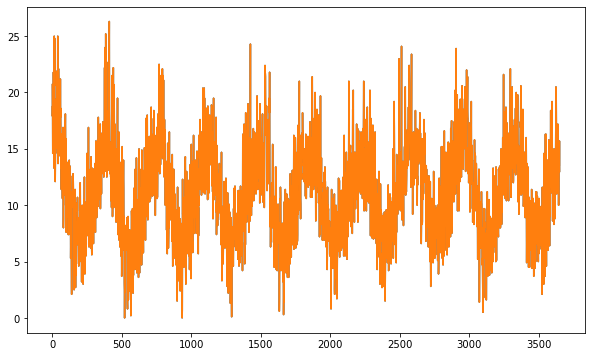

In [8]:
#plotting the data
plt.figure(figsize=(10,6))
low_temps['Temp'].plot()
low_temps['Temp'].plot()

In [9]:
## Adjust: take monthly values of average of daily, to get 120 values - plot before proceeding
## Step 1 extract year-month as new column
## Step 2 merge/aggregate and calculate average

In [10]:
low_temps['year_month'] = low_temps['Date'].str[:7]

In [11]:
low_temps.head()

,Date,Temp,year_month
0,1981-01-01,20.7,1981-01
1,1981-01-02,17.9,1981-01
2,1981-01-03,18.8,1981-01
3,1981-01-04,14.6,1981-01
4,1981-01-05,15.8,1981-01


In [12]:
low_temps_monthly = low_temps.groupby("year_month").mean()

In [13]:
low_temps_monthly.head()

,Temp
year_month,
1981-01,17.712903
1981-02,17.678571
1981-03,13.500000
1981-04,12.356667
1981-05,9.490323


In [14]:
# round to 1 dp:
low_temps_monthly['Temp'] = round(low_temps_monthly['Temp'],1)

In [15]:
low_temps_monthly = low_temps_monthly.reset_index()

In [16]:
low_temps_monthly.head()

,year_month,Temp
0,1981-01,17.7
1,1981-02,17.7
2,1981-03,13.5
3,1981-04,12.4
4,1981-05,9.5


In [17]:
# divide into train and validation set
train = low_temps_monthly[:int(0.7*(len(low_temps_monthly)))]
valid = low_temps_monthly[int(0.7*(len(low_temps_monthly))):]

In [18]:
#preprocessing (since arima takes univariate series as input)
train.drop('year_month',axis=1,inplace=True)
valid.drop('year_month',axis=1,inplace=True)

/Users/steve_gabriel/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


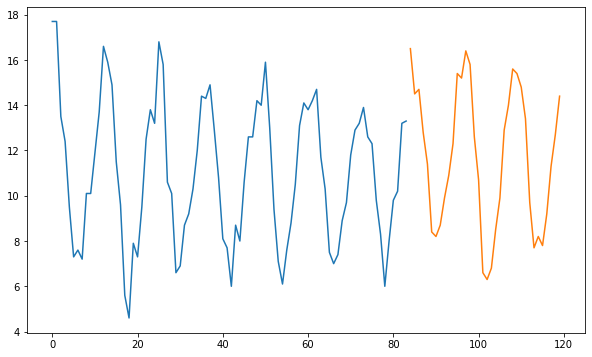

In [19]:
#plotting the data
plt.figure(figsize=(10,6))
train['Temp'].plot()
valid['Temp'].plot()

In [20]:
## Required step (added by SG, refer https://pypi.org/project/pmdarima/)

In [21]:
import matplotlib.pyplot as plt 

**From terminal, type: pip install pmdarima**

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=268.928, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=433.622, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=353.493, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=374.282, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=649.818, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=338.735, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=287.482, Time=0.29 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=268.572, Time=0.32 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=328.401, Time=0.13 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=283.683, Time=0.39 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=284.819, Time=0.45 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.30 se

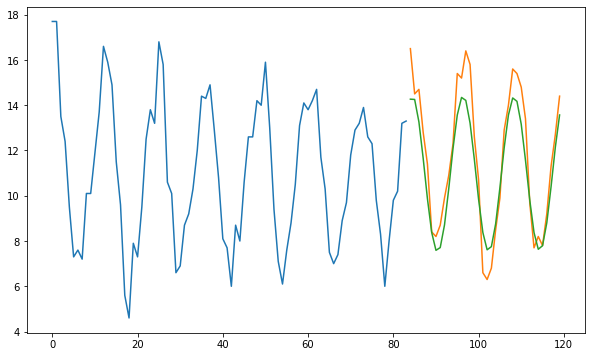

In [22]:
#building the model
from pmdarima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.figure(figsize=(10,6))
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [23]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,forecast))
print(round(rms,3))

1.179


In [24]:
## Improvements: remove daily data lines, increase chart size, add commentary & headings 